# TITLE : MODELS OF DENSITY FROM COMPOSITIONAL DATA MWC7+  TEMP PRESSURE USING MACHINE LEARNING ALGORITHM

OBJECTIVE : TRINING OF MODELS FOR FUTURE SELECTION FOR PREDICTION OF DENSITY USING WIDE RANGE OF COMPOSITION DATA.

THIS FILE AUTOMATICALLY FIT MODELS AND STORE MODELS AT GIVEN PATH 

IF REVIEWER WANT TO CHECK SIMILLAR MODELS USED TO PREDICT TEST OR NOT WHICH TRAINED HERE THAN IN MODEL VALIDATION FILE OPTIMIZED PARAMETER CAN BE CKECKED WHICH AVOID RETRAINING WHICH TAKE A LOT TIME AS WELL AS TO CHECK DATA TRAIN AND TEST ALREADY SEPRATED AND STAROED INTO DATASOURCE FROM PREPROCESSING FILE SAME DATA USED HERE WHICH VERIFIED BY CHEKING EXCEL FILES 


ALGORITHM APPLIED : LINEAR REGRESSION, SUPPORT VECTOR MACHINE, KNN, RANDOM FOREST, DECISION TREE, XGB , ANN

In [1]:
#DATA EXTRACTION, MANIPULATION, VIZULIZATION LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#STATISTICAL TOOLS LIBRARY
import scipy.stats as stat
import pylab 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#DATA FETURES OPERATION LIBRARY
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

#MODELING LIBRARY
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

#MODELLING OF DEEP LEARNING MODEL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch


#MODEL EVALUATION LIBRARY
from sklearn.metrics import mean_squared_error , mean_absolute_error


#Model saving
import pickle


<ipython-input-1-1ef187d9cf9b>:33: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [2]:
path = "C:\\STUDY DRIVE\\DENSITY PAPER THESIS\\DENSITY COMPOSITION\\MODEL 3\\DATASOURCE\\"
file_name = "TRAIN.csv"
model_path = "C:\\STUDY DRIVE\\DENSITY PAPER THESIS\\DENSITY COMPOSITION\\MODEL 3\\MODELS\\"

export_data_path = "C:\\STUDY DRIVE\\DENSITY PAPER THESIS\\DENSITY COMPOSITION\\MODEL 3\\EXPORTED DATA\\"

train = pd.read_csv(path+file_name)

In [3]:
train.head()

,H2S,N2,CO2,C1,C2,C3-C6,C7+,MWC7+,Temp,P,Density
0,0.00000,0.0002,0.00960,0.32030,0.034900,0.021200,0.61390,283.486905,333.15,244.163133,867.630061
1,0.00000,0.0103,0.01380,0.36170,0.075732,0.204968,0.33350,195.711574,427.60,194.655432,569.556880
2,0.00000,0.0121,0.01940,0.65990,0.086900,0.155800,0.06590,140.000000,366.70,413.800000,391.400000
3,0.00000,0.0065,0.00860,0.18062,0.059914,0.219106,0.52525,233.365889,323.20,58.104568,727.655316
4,0.00355,0.0040,0.02548,0.47244,0.069370,0.153400,0.27176,214.209832,394.25,276.000000,606.061000


In [4]:
X_train = train.drop("Density",axis = 1)
y_train = train.Density

                              #### Scalling Dataset ####

In [5]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)

In [6]:
#following model path follows for all models location
scaler_file = 'scaler.sav'
pickle.dump(scaler , open(model_path+scaler_file , "wb") )

##### .......................................................................................SectionBreak.......................................................................................

## 1. Linear Regression Model

                              #### Calculate VIF for features ####

In [7]:
VIF = [variance_inflation_factor(x_train , i) for i in range(0,x_train.shape[1])]  #shape is indicating number of columns which is argument for VIF

In [8]:
VIF_DataFrame = pd.DataFrame(VIF)
VIF_DataFrame = VIF_DataFrame.rename({0:"VIF"} , axis = 1)
VIF_DataFrame["FEATURES"] = X_train.columns
VIF_DataFrame = VIF_DataFrame[["FEATURES" , "VIF"]]
VIF_DataFrame

,FEATURES,VIF
0,H2S,71.367143
1,N2,29.795244
2,CO2,11.274044
3,C1,708.850791
4,C2,63.954005
5,C3-C6,88.763298
6,C7+,677.649821
7,MWC7+,5.929897
8,Temp,1.491827
9,P,1.753342


In [9]:
VIF_DataFrame.to_excel(export_data_path+"VIF.xlsx")

                              #### Model Fitting for linear regression ####

In [10]:
linear_regression = LinearRegression()
linear_regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

                         #### Model Summary #### 

In [11]:
x_train_linear_summary = sm.add_constant(x_train, prepend=False)
y_train_linear_summary = y_train

In [12]:
linear_summary = sm.OLS(y_train_linear_summary ,  x_train_linear_summary).fit()

In [13]:
linear_summary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Density   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     114.0
Date:                Sat, 26 Feb 2022   Prob (F-statistic):           6.04e-67
Time:                        16:33:26   Log-Likelihood:                -961.54
No. Observations:                 169   AIC:                             1945.
Df Residuals:                     158   BIC:                             1980.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -34.1240     48.098     -0.709      0.479    -129.123      60.875
x2            -8.8762     31.078     -0.286      0.776     -70.258      52.506
x3           -10.3588     19.117     -0.542      0.589     -48.117      27.399
x4          -111.8624    151.586     -0.738      0.462    -411.259     187.534
x5           -19.1084     45.532     -0.420      0.675    -109.038      70.821
x6            21.0004     53.641      0.391      0.696     -84.946     126.947
x7            81.7360    148.212      0.551      0.582    -210.997     374.469
x8           -28.4716     13.865     -2.054      0.042     -55.855      -1.088
x9           -51.5803      6.954     -7.417      0.000     -65.315     -37.845
x10           59.3126      7.539      7.867      0.000      44.422      74.203
const        567.0905      5.694     99.603      0.000     555.845     578.336
==============================================================================
Omnibus:                        4.381   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                3.385
Skew:                          -0.224   Prob(JB):                        0.184
Kurtosis:                       2.470   Cond. No.                         71.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                                    #### Model Saving ####

In [14]:
linear_file = 'linear_model.sav'
pickle.dump(linear_regression , open(model_path+linear_file , "wb") )

## 2. SVR MODEL

                              #### Model tuning for svr Regression ####

In [15]:
svr_model = SVR()

In [16]:
svr_para = {'C':range(4000,10000,100),'gamma':np.arange(0.000,0.002,0.0001)}
svr_grid = GridSearchCV(svr_model,svr_para, cv = 5 , verbose=3, n_jobs=-1)

In [17]:
svr_grid.fit(x_train,y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 5936 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:    5.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': range(4000, 10000, 100),
                         'gamma': array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
       0.0016, 0.0017, 0.0018, 0.0019])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [18]:
svr_grid.best_params_

{'C': 9900, 'gamma': 0.0019}

In [19]:
svr_best_para = svr_grid.best_params_

In [20]:
svr_regression = SVR( C = svr_best_para["C"],
                      gamma = svr_best_para["gamma"])
svr_regression.fit(x_train,y_train)

SVR(C=9900, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0019,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

                                          #### Model saveing #### 

In [21]:
svr_file = 'svr_model.sav'
pickle.dump(svr_regression , open(model_path+svr_file , "wb") )

## 3. Decision Tree Model 

                                          #### Model tuning #### 

In [22]:
dt_model = DecisionTreeRegressor()

In [23]:
dt_para = {
    'criterion': ['mse', 'mae'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,7,1),
    'min_samples_split': range(2,7,1),
    'splitter' : ['best', 'random']
    }

In [24]:
dt_grid = GridSearchCV(estimator=dt_model,
                     param_grid=dt_para,
                     cv=5,
                     n_jobs =-1,
                     verbose=3)
dt_grid.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 3600 candidates, totalling 18000 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 17672 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 18000 out of 18000 | elapsed:    8.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 7),
                  

In [25]:
dt_grid.best_params_

{'criterion': 'mae',
 'max_depth': 24,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'random'}

In [26]:
dt_best_para = dt_grid.best_params_

In [27]:
dt_regression = DecisionTreeRegressor(criterion = dt_best_para["criterion"],
                                      max_depth = dt_best_para["max_depth"],
                                      min_samples_leaf = dt_best_para["min_samples_leaf"],
                                      min_samples_split = dt_best_para["min_samples_split"],
                                      splitter = dt_best_para["splitter"],
                                      random_state = 0
                                      )

dt_regression.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=24,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='random')

                                          #### Model saveing #### 

In [28]:
#model_path = 'C:\\STUDY DRIVE\\Mtech New\\DENSITY PREDICTION\\MODELS\\SATURATION PRESSURE PREDICTION SATURATION DATASET 2 PART 4 MODELS\\'
dt_file = 'dt_model.sav'
pickle.dump(dt_regression , open(model_path+dt_file , "wb") )

## 4. Random forest Model 

                                          #### Model parameter tuning #### 

In [29]:
rf_model = RandomForestRegressor()

In [30]:
rf_para = {
    "n_estimators" : range(90,150,5),
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,5,1),
    'min_samples_split': range(2,5,1),
    'max_features' : ['auto','log2']
}

rf_grid = GridSearchCV(estimator=rf_model,
                           param_grid=rf_para,
                           cv=5,
                           n_jobs =-1,
                           verbose = 3)

In [31]:
rf_grid.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 2256 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 4048 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 5136 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 7696 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 9168 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 10768 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 12496 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 14352 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 16336 tasks      | elapsed: 

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [32]:
rf_grid.best_params_

{'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 120}

In [33]:
rf_best_para = rf_grid.best_params_

                                          #### Model fiting with tuning #### 

In [34]:
rf_regression = RandomForestRegressor(n_estimators = rf_best_para["n_estimators"],
                                      max_depth = rf_best_para["max_depth"],
                                      min_samples_leaf =rf_best_para["min_samples_leaf"],
                                      min_samples_split = rf_best_para["min_samples_split"],
                                      max_features = rf_best_para["max_features"],
                                      random_state = 0
                                      )

rf_regression.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=120, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

                                          #### Model Saving #### 

In [35]:
rf_file = 'rf_model.sav'
pickle.dump(rf_regression , open(model_path+rf_file , "wb") )

## 5. KNN Model

In [36]:
knn_model = KNeighborsRegressor()

In [37]:
knn_para = {"n_neighbors"  : range(2,11)}
knn_grid = GridSearchCV(knn_model,knn_para, verbose=3, n_jobs=-1)

In [38]:
knn_grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(2, 11)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=3)

In [39]:
knn_grid.best_params_

{'n_neighbors': 3}

In [40]:
knn_best_para = knn_grid.best_params_

In [41]:
knn_regression = KNeighborsRegressor( n_neighbors = knn_best_para["n_neighbors"])

knn_regression.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

                                          #### Model Saving #### 

In [42]:
knn_file = 'knn_model.sav'
pickle.dump(knn_regression , open(model_path+knn_file , "wb") )

## 6. XGB Model

In [43]:
xgb_model = XGBRegressor()

In [44]:
xgb_para={
   
    'learning_rate': np.arange(0.1,0.2,0.04),
    'max_depth': range(2,10,1),
    'n_estimators':range(90,150,10),
    "gamma" : np.arange(0.1,0.5,0.3),
    "min_child_weight": range(1,10,2)
}

In [45]:
xgb_grid = GridSearchCV(xgb_model,xgb_para, cv = 5 , verbose=3, n_jobs=-1)

In [46]:
xgb_grid.fit(x_train,y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | e

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={

In [47]:
xgb_grid.best_params_

{'gamma': 0.1,
 'learning_rate': 0.14,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 140}

In [48]:
xgb_best_para = xgb_grid.best_params_

In [49]:
xgb_regression = XGBRegressor(
                    learning_rate = xgb_best_para["learning_rate"],
                    max_depth = xgb_best_para["max_depth"],
                    n_estimators = xgb_best_para["n_estimators"],
                    gamma = xgb_best_para["gamma"],
                    min_child_weight = xgb_best_para["min_child_weight"]
                    )
xgb_regression.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.14, max_delta_step=0, max_depth=3,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=140, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [50]:
xgb_file = 'xgb_model.sav'
pickle.dump(xgb_regression , open(model_path+xgb_file , "wb") )

## 7. ANN Model

In [51]:
def build_model(hp):
    model = keras.Sequential()
    model.add(tf.keras.Input(shape=x_train.shape[1]))
    
    for i in range(hp.Int('layers', 2, 15)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=3,
                                            max_value=15,
                                            step=1),
                               activation=hp.Choice('act_' + str(i),["relu","tanh"])))
        
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error',
        metrics=['mean_squared_error'])
    return model

In [52]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_squared_error',
    max_trials=50,
    executions_per_trial=3,
    project_name = "ANN")

In [53]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 15, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 15, 'step': 1, 'sampling': None}
act_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 15, 'step': 1, 'sampling': None}
act_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [54]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 25)

In [55]:
tuner.search(x_train, y_train.values,
             epochs=100,
             validation_split = 0.20,
             callbacks=[early_stop])

Trial 50 Complete [00h 00m 09s]
val_mean_squared_error: 365447.34375

Best val_mean_squared_error So Far: 3672.2986653645835
Total elapsed time: 00h 09m 09s
INFO:tensorflow:Oracle triggered exit


In [56]:
tuner.results_summary()

Results summary
Results in .\ANN
Showing 10 best trials
Objective(name='val_mean_squared_error', direction='min')
Trial summary
Hyperparameters:
layers: 4
units_0: 10
act_0: tanh
units_1: 8
act_1: relu
learning_rate: 0.01
units_2: 8
act_2: relu
units_3: 13
act_3: relu
units_4: 8
act_4: tanh
units_5: 13
act_5: relu
units_6: 3
act_6: relu
units_7: 13
act_7: tanh
units_8: 11
act_8: tanh
units_9: 9
act_9: tanh
units_10: 8
act_10: relu
units_11: 8
act_11: tanh
units_12: 13
act_12: relu
units_13: 6
act_13: relu
units_14: 3
act_14: relu
Score: 3672.2986653645835
Trial summary
Hyperparameters:
layers: 13
units_0: 3
act_0: tanh
units_1: 7
act_1: tanh
learning_rate: 0.001
units_2: 15
act_2: relu
units_3: 12
act_3: tanh
units_4: 8
act_4: relu
units_5: 13
act_5: relu
units_6: 10
act_6: tanh
units_7: 8
act_7: tanh
units_8: 10
act_8: relu
units_9: 13
act_9: relu
units_10: 13
act_10: relu
units_11: 11
act_11: relu
units_12: 15
act_12: relu
units_13: 12
act_13: tanh
units_14: 13
act_14: tanh
Score: 52

In [57]:
'''This link has proved that while showing summary of result number of unit shows higher than 
    actual number of layers which reported as bug in official keras documents.
    However it has been proven that finalized model description can be obtained by following.
    Use number of layer shown as number_layer arguments [i.g best model with number_layer = 4
    units_0 to units_3 in our case. Avoid higher values.]
    
    https://github.com/keras-team/keras-tuner/issues/66#issuecomment-525923517'''
tuner.get_best_models()[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 13)                117       
                                                                 
 dense_4 (Dense)             (None, 1)                 14        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [58]:
ann_best_para = tuner.get_best_hyperparameters()[0].values

In [59]:
ann_regression = Sequential()


#Input layer 
ann_regression.add(tf.keras.Input(shape=x_train.shape[1]))

limit = ann_best_para["layers"] 

#Number of hidden layer
for i in range(0, limit) :
    ann_regression.add(Dense(units=ann_best_para['units_'+str(i)],activation=ann_best_para['act_'+str(i)]))

    
#Last Output Layer
ann_regression.add(Dense(units=1,activation='linear'))



#ANN compilation with loss function and optimization
ann_regression.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=ann_best_para['learning_rate']))

In [60]:
early_stop_final = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 100)

In [61]:
ann_regression.fit(x=x_train, 
          y=y_train, 
          epochs=1000,
          validation_split=0.20, 
          verbose=1,
          callbacks=[early_stop_final],
          )

Epoch 1/1000
5/5 [==============================] - 0s 25ms/step - loss: 362600.9062 - val_loss: 365856.3750
Epoch 2/1000
5/5 [==============================] - 0s 4ms/step - loss: 361595.0625 - val_loss: 364463.5938
Epoch 3/1000
5/5 [==============================] - 0s 4ms/step - loss: 359746.2812 - val_loss: 361743.2500
Epoch 4/1000
5/5 [==============================] - 0s 4ms/step - loss: 356208.6562 - val_loss: 356330.6562
Epoch 5/1000
5/5 [==============================] - 0s 4ms/step - loss: 349427.7500 - val_loss: 346224.4688
Epoch 6/1000
5/5 [==============================] - 0s 4ms/step - loss: 336772.9688 - val_loss: 327949.5312
Epoch 7/1000
5/5 [==============================] - 0s 4ms/step - loss: 314827.4375 - val_loss: 295470.7812
Epoch 8/1000
5/5 [==============================] - 0s 4ms/step - loss: 277640.4062 - val_loss: 244476.0000
Epoch 9/1000
5/5 [==============================] - 0s 4ms/step - loss: 220506.1250 - val_loss: 172110.8594
Epoch 10/1000
5/5 [========

5/5 [==============================] - 0s 4ms/step - loss: 1095.7640 - val_loss: 3020.1838
Epoch 79/1000
5/5 [==============================] - 0s 4ms/step - loss: 1066.4552 - val_loss: 2990.1118
Epoch 80/1000
5/5 [==============================] - 0s 4ms/step - loss: 1074.8092 - val_loss: 2922.6992
Epoch 81/1000
5/5 [==============================] - 0s 4ms/step - loss: 1000.3409 - val_loss: 2780.4880
Epoch 82/1000
5/5 [==============================] - 0s 4ms/step - loss: 1022.4380 - val_loss: 2750.0718
Epoch 83/1000
5/5 [==============================] - 0s 4ms/step - loss: 980.6738 - val_loss: 2847.9316
Epoch 84/1000
5/5 [==============================] - 0s 4ms/step - loss: 974.9414 - val_loss: 2827.9160
Epoch 85/1000
5/5 [==============================] - 0s 4ms/step - loss: 964.2953 - val_loss: 2744.8247
Epoch 86/1000
5/5 [==============================] - 0s 4ms/step - loss: 941.0888 - val_loss: 2685.1956
Epoch 87/1000
5/5 [==============================] - 0s 4ms/step - loss: 

5/5 [==============================] - 0s 4ms/step - loss: 348.8412 - val_loss: 943.2906
Epoch 157/1000
5/5 [==============================] - 0s 4ms/step - loss: 345.0706 - val_loss: 1014.3139
Epoch 158/1000
5/5 [==============================] - 0s 4ms/step - loss: 339.1528 - val_loss: 991.7064
Epoch 159/1000
5/5 [==============================] - 0s 4ms/step - loss: 336.8478 - val_loss: 1035.2302
Epoch 160/1000
5/5 [==============================] - 0s 4ms/step - loss: 320.3034 - val_loss: 1042.7109
Epoch 161/1000
5/5 [==============================] - 0s 4ms/step - loss: 353.1299 - val_loss: 1034.7227
Epoch 162/1000
5/5 [==============================] - 0s 4ms/step - loss: 346.4420 - val_loss: 1081.6376
Epoch 163/1000
5/5 [==============================] - 0s 4ms/step - loss: 310.0940 - val_loss: 1028.3955
Epoch 164/1000
5/5 [==============================] - 0s 4ms/step - loss: 328.2421 - val_loss: 1008.8324
Epoch 165/1000
5/5 [==============================] - 0s 4ms/step - loss

Epoch 235/1000
5/5 [==============================] - 0s 4ms/step - loss: 172.2152 - val_loss: 848.8588
Epoch 236/1000
5/5 [==============================] - 0s 4ms/step - loss: 176.2249 - val_loss: 862.1077
Epoch 237/1000
5/5 [==============================] - 0s 4ms/step - loss: 163.7327 - val_loss: 1001.7184
Epoch 238/1000
5/5 [==============================] - 0s 4ms/step - loss: 173.1095 - val_loss: 956.5935
Epoch 239/1000
5/5 [==============================] - 0s 4ms/step - loss: 180.3757 - val_loss: 972.8777
Epoch 240/1000
5/5 [==============================] - 0s 4ms/step - loss: 163.4874 - val_loss: 869.9030
Epoch 241/1000
5/5 [==============================] - 0s 4ms/step - loss: 159.4633 - val_loss: 881.5170
Epoch 242/1000
5/5 [==============================] - 0s 4ms/step - loss: 185.3103 - val_loss: 840.2098
Epoch 243/1000
5/5 [==============================] - 0s 4ms/step - loss: 203.2511 - val_loss: 889.9073
Epoch 244/1000
5/5 [==============================] - 0s 4ms/st

In [62]:
pd.DataFrame(ann_regression.history.history)

,loss,val_loss
0,362600.906250,365856.375000
1,361595.062500,364463.593750
2,359746.281250,361743.250000
3,356208.656250,356330.656250
4,349427.750000,346224.468750
...,...,...
271,153.229828,975.510559
272,148.608765,858.196960
273,193.675201,855.496216
274,210.801682,993.257141


<AxesSubplot:>

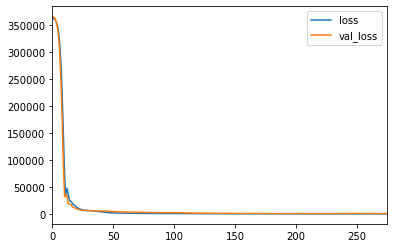

In [63]:
ann_regression_df = pd.DataFrame(ann_regression.history.history)
ann_regression_df[["loss","val_loss"]].plot()

In [64]:
ann_regression.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 8)                 88        
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 dense_8 (Dense)             (None, 13)                117       
                                                                 
 dense_9 (Dense)             (None, 1)                 14        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [65]:
ann_regression.evaluate(x_train,y_train)

6/6 [==============================] - 0s 798us/step - loss: 277.4771


277.4771423339844

In [66]:
ann_regression_df.to_csv(export_data_path+"LOSS_VALUES.csv")

In [67]:
ann_file = 'ann_model.h5'
ann_regression.save(model_path+ann_file)


.......................................THE END..........................................................